# Healthy Brain

In [1]:
import sumProduct as sp
import numpy as np
import graphviz as gp
import subprocess
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [2]:
factors=[] 
variables=[]
hidden=[]
sensory=[]
allNodes=[]

In [3]:
vlist=['P'+str(i) for i in range(20)]
hidden=[sp.variableNode(name, vrange=['pain','nopain']) for name in vlist]
len(hidden)

20

In [4]:
Slist=['S'+str(i) for i in range(20)]
sensory=[sp.variableNode(name, vrange=['tickle','noci']) for name in Slist]
variables=hidden+sensory
print(len(variables))

40


In [5]:
pT0=sp.factorNode()
pT0.addNeighbour(hidden[0])

def PT0(x):
    T1,=x
    if T1=='pain':
        return 0.7
    if T1=='nopain':
        return 0.3
    raise ValueError('Invalid argument'+str(x))
    
pT0.setValues(PT0)
factors+=[pT0]
print(len(factors))

1


In [6]:
def pTgivenT(x):
    T1,T2=x
    if T1=='pain' and T2=='pain':
        return 0.43324968665739805 #Pp=0.3, Pnp=0.7
    if T1=='pain' and T2=='nopain':
        return 0.2428929914325436
    if T1=='nopain' and T2=='pain':
        return 0.566750313342602
    if T1=='nopain' and T2=='nopain':
        return 0.7571070085674564  
    raise ValueError('Invalid argument'+str(x))

def pSgivenT(x):
    S1,T1=x
    if S1=='tickle' and T1=='nopain':
        return 0.9
    if S1=='noci' and T1=='nopain':
        return 0.1
    if S1=='tickle' and T1=='pain':
        return 0.1
    if S1=='noci' and T1=='pain':
        return 0.9
    raise ValueError('Invalid argument'+str(x))

In [7]:
parent=hidden[0]

for child in hidden[1:]:
        p=sp.factorNode()
        p.addNeighbour(child)
        p.addNeighbour(parent)
        p.setValues(pTgivenT)
        factors+=[p]
        parent=child

child = sensory[0]

for h,s in zip(hidden,sensory):
    f=sp.factorNode()
    f.addNeighbour(s)
    f.addNeighbour(h)
    factors+=[f]
    f.setValues(pSgivenT)

print(len(factors))

allNodes=variables+factors

40


In [8]:
sp.runSumProduct(allNodes)

In [9]:
Marginals=[]
for h in hidden: 
    Marginals.append(h.marginal()[0])

In [10]:
pain_prob = [d['pain'] for d in Marginals]
print(pain_prob)
nopain_prob = [d['nopain'] for d in Marginals]
print(nopain_prob)

[0.7, 0.3761426780899417, 0.31449426856677115, 0.302759081064072, 0.3005252095532141, 0.30009997715485026, 0.3000190313207952, 0.3000036227393323, 0.30000068961268694, 0.30000013127239206, 0.30000002498857864, 0.30000000475674315, 0.3000000009054778, 0.30000000017236367, 0.3000000000328105, 0.30000000000624566, 0.3000000000011888, 0.30000000000022625, 0.300000000000043, 0.3000000000000081]
[0.3, 0.6238573219100583, 0.6855057314332288, 0.697240918935928, 0.6994747904467858, 0.6999000228451497, 0.6999809686792048, 0.6999963772606678, 0.6999993103873131, 0.699999868727608, 0.6999999750114213, 0.6999999952432567, 0.6999999990945222, 0.6999999998276363, 0.6999999999671894, 0.6999999999937543, 0.6999999999988111, 0.6999999999997737, 0.699999999999957, 0.6999999999999919]


In [11]:
hiddenNames=[]
for h in hidden: 
    hiddenNames.append(h.name)

In [14]:
hiddenNames

['P0',
 'P1',
 'P2',
 'P3',
 'P4',
 'P5',
 'P6',
 'P7',
 'P8',
 'P9',
 'P10',
 'P11',
 'P12',
 'P13',
 'P14',
 'P15',
 'P16',
 'P17',
 'P18',
 'P19']

In [12]:
M2painprob=[0.7, 0.33543402995631716, 0.3031389261973629, 0.30027806201227, 0.3000246321441811, 0.3000021820403369, 0.3000001932962066, 0.3000000171231588, 0.30000000151685624, 0.3000000001343707, 0.3000000000119032, 0.30000000000105437, 0.3000000000000933, 0.30000000000000815, 0.30000000000000066, 0.29999999999999993, 0.2999999999999999, 0.2999999999999999, 0.2999999999999999, 0.2999999999999999]
M3painprob=[0.7, 0.42431294987360485, 0.3386342737656935, 0.3120068513450944, 0.3037315177735064, 0.3011596899548259, 0.30036041119805795, 0.30011200944799515, 0.30003481056223497, 0.3000108185091954, 0.30000336220197826, 0.30000104491311497, 0.30000032474057914, 0.3000001009236483, 0.300000031365291, 0.3000000097477796, 0.3000000030294381, 0.3000000009414959, 0.3000000002926003, 0.30000000009093497]
M4painprob=[0.7, 0.5749369409290667, 0.4889758037185827, 0.42989107345999716, 0.3892796359777107, 0.361365675007431, 0.34217922741147583, 0.3289915693881565, 0.3199271335007812, 0.3136967628154747, 0.30941436517279397, 0.30647089190349275, 0.30444771806257237, 0.3030571049955964, 0.30210127773897055, 0.30144429718398724, 0.30099272662389476, 0.3006823430528811, 0.3004690032790583, 0.300322365817075]
M5painprob=[0.7, 0.44019615384200517, 0.34913565020426635, 0.31721920460354947, 0.30603258187372145, 0.30211170266100945, 0.30073744573182154, 0.30025577261593006, 0.3000869475689938, 0.3000277748737931, 0.3000070350136785, 0.29999976575213616, 0.29999721789679484, 0.29999632488079836, 0.2999960118812504, 0.2999959021758057, 0.2999958637243617, 0.29999585024724074, 0.2999958455235485, 0.2999958438679079]
M6painprob=[0.7, 0.5479890086746568, 0.4537463709747726, 0.39531852517760585, 0.35909486624979864, 0.336637193059634, 0.32271405276832915, 0.31408208836445417, 0.3087305076211145, 0.3054126746097055, 0.3033557093092574, 0.3020804473437824, 0.3012898199665326, 0.3007996527173086, 0.3004957624914887, 0.30030735890170357, 0.3001905538529458, 0.3001181379322573, 0.30007324205125785, 0.30004540783867656]

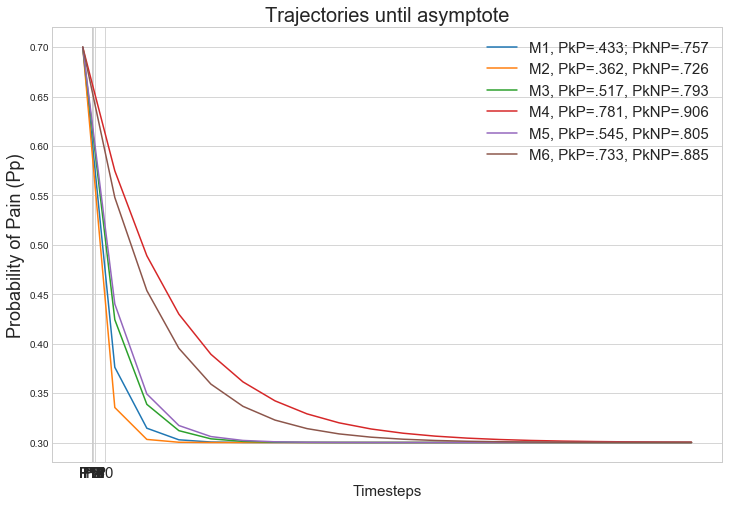

In [13]:
fig = plt.figure()
plt.figure(figsize=(12.0,8.0))
plt.style.use('seaborn-whitegrid')
ax = plt.axes()

plt.title('Trajectories until asymptote', fontsize=20)
ax.plot(pain_prob, label='M1, PkP=.433; PkNP=.757')
ax.plot(M2painprob, label='M2, PkP=.362, PkNP=.726')
ax.plot(M3painprob, label='M3, PkP=.517, PkNP=.793')
ax.plot(M4painprob, label='M4, PkP=.781, PkNP=.906')
ax.plot(M5painprob, label='M5, PkP=.545, PkNP=.805')
ax.plot(M6painprob, label='M6, PkP=.733, PkNP=.885')

ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))
plt.xlabel('Timesteps', fontsize=15)
plt.ylabel('Probability of Pain (Pp)', fontsize=18)
plt.xticks(pain_prob, hiddenNames, fontsize=15)


plt.legend(fontsize=15)

plt.savefig("Trajectory_comparison.png")
plt.show()

# Plot für mehrere Trajektorien

Ich will einen Plot für wenn man die verschiedenen Transprobs, die auf der gleichen Gerade liegen, in das Modell einspeist - je nach Transprob sollte bei der selben Pp unterschiedliche Zeitschritte erforderlich sein, bis eine Asymptote erreicht wird!

### Was sind die dafür erforderlichen Schritte?

1) Ich brauche die marginals für verschiedene Parametersettings. Die einzige aber super stupide Herangehensweise die mir einfällt: verschiedene Modelle bauen und die marginals aus diesen Modellen in jeweils spezifische Lists packen. 

- Bisher habe ich: pain_prob und hidden names

- Jetzt versuche ich sowas wie: M2pain_prob und M2hidden_names noch dazu zu plotten - ich hoffe mal dass das geht!
- Bis M8pain_prob und M8hidden_names...
- es muss einen eleganteren Weg geben :'-(

Das sind die TRANSPROBS mit denen ich arbeiten werde: 

PkeepPain (bei einer Pp von 0.3): 

[0.36200955242355504,
 0.5175476622788086,
 0.7811396466258667,
 0.43324968665739805,
 0.5453542942235091,
 0.7339807653460811]
 
 PkeepNoPain (dazu passend):
 
 [0.726575522467238,
 0.7932347124052037,
 0.9062027056968001,
 0.7571070085674564,
 0.805151840381504,
 0.885991756576892]
 
 PnotkeepPain (1-PkeepPain), T1=pain T2=nopain
 
 [0.637990447576445, 
 0.48245233772119145,
 0.21886035337413334, 
 0.566750313342602, 
 0.4546457057764909, 
 0.26601923465391886]
 
 PnotkeepNoPain (1-PkeepNoPain), T1=nopain, T2=pain
 
 [0.273424477532762, 
 0.2067652875947963, 
 0.09379729430319994, 
 0.24289299143254361, 
 0.194848159618496, 
 0.114008243423108]
 